# Nesterov Accelerated Gradient Descent and Facial Emotion Recognition

Zhengming Song

Professor: Dr. Marina Chugunova

2018/12/20

## Table of Content
---
* Motivation
* Project Goals
* Nestrerove Accelerated Gradient Descent Method
* Data
* Features
* Methods
    - SVM
    - CNN

## Motivation
---
People with Autism Spectrum DIsorder experience difficulties on recognizing and responding to people's emotion, so that it's challending for them to have proper communication and interactions with others.

Desktop, mobile, and wearable applications has been developed to help people with expression. This project is the author's attemp to make contributions.

<img src="./production/autism-kids-emotion-detection.jpg" stype="display:block; margin-left:auto; margin-right:auto" width="500"/>


## Project Goals
---
1. Developing better understanding of Nesterov Acceleration Gradient Descent
2. Implementing machine learning models for emotion recognition


## Nestrerove Accelerated Gradient Descent Method
---
### Gradient Descent Method
From class we have learned gradient descent method, which is an method for finding the optimal (minimal) solution for a smooth convex function $f: \Bbb R^n \longrightarrow \Bbb R$ using the iterative update scheme:
$$x^{k} = x^{k-1} - \alpha_k \nabla f(x^{(k-1)}) , k\in \Bbb N^+$$
where $N^{+}$ stands for positive integers $(1, 2, 3, \dots)$.
In addition, if the gradient of the function $f$, $\nabla f$, is Lipschitz continuous with constant $L >0$, i.e.
$$|\nabla f(x_1) - \nabla f(x_2)|\le L|x_1 - x_2|$$
with the step size is either predefined fixed constant at $\alpha_k = \alpha \le 1/L, k\in \Bbb n^+$ or chosen by backtracking line search (the second optimization problem to determine $\alpha_k$), then one can show that the convergence rate of gradient descent is $\mathcal{O}(1/k)$, more specifically:
$$f(x^{(k)}) - f(x^{(0)}) \le \frac{C\|x^{(k)} - x^{(0)} \|^2}{k}$$
where C is a constant depending on the Lipschitz constant $L$.

## Nestrerove Accelerated Gradient Descent Method
---
### Question?

Is the convergence rate $\mathcal{O}(1/k)$ the best we can do by only using the first gradient information in each step, like gradient descent does?

## Nestrerove Accelerated Gradient Descent Method
---
### First-order method
Consider a smooth, convex function $f$, with $dom(f) = \Bbb R^n$, such that $\nabla f$ Lipschitz continuous with constant $L>0$. Given an initial point $x^{(0)}$, first-order methods are any algorithms that produce iterates satisfying
$$x^{(k)} \in x^{(0)} + span\{\nabla f(x^{(0)}), \dots, \nabla f(x^{(k-1)})\}$$
Given the same assumption for the function $f$ using any first-order algorithm, Nemirovski originally, in 1983, proved that
\begin{equation}
f(x^{(k)}) - f(x^{(0}) \ge \frac{3L\|x^{(0)} - x^*\|^2_2}{32(k+1)^2}, k\in (1, 2, \dots, \frac{n-1}{2})
\end{equation}
where $x^*$ is the analytically optimal solution that minimize $f \in \Bbb R^n$. Nesterov also proved such lower bound using a different way.

**Now the question is given the analytical property of first-order method, is there a metehod to achieve such convergence rate?**

## Nestrerove Accelerated Gradient Descent Method
---
Answer is **YES**! In 1983, Nesterov provided an first-order method iterative update algorithm that has $O(1/k^2)$ convergence rate, which is called Nesterov's accelerate gradient method, also known as Nesterov's optimal gradients method (because it reaches the lower bound).

## Nestrerove Accelerated Gradient Descent Method
---
* $k=0$,
    $a_0 = 1$, $x_{-1} = y_0$, $\epsilon_{-1} = \|y_0 - z\|/\|\nabla f(y_0) - \nabla f(z)\|$, $y_0$ and $z$ are arbitrary vectors
* $k=t$,
    - \begin{equation}
    \label{eq:epsilon_update}
        \epsilon_{t} = 2^{-i}\epsilon_{t-1}
    \end{equation}
    here $i$ is the smallest positive integer for which
    \begin{equation}
        f(y_t) - f(y_t -2^{-i} \epsilon_{t-1} \nabla f(y_t)) \ge 2^{-i} \epsilon_{t-1} \frac{||\nabla f(y_t)\|^2}{2}
    \end{equation}
    - \begin{equation}
    \label{eq:x_t_update}
        x_t = y_t - \epsilon_t \nabla f(y_t)
    \end{equation}
    - \begin{equation}
    \label{eq:a_t_update}
        a_{t+1} = (1 + \sqrt{4a_t^2 + 1})/2
    \end{equation}
    - \begin{equation}
    \label{eq:y_t_update}
        y_{t+1} = x_t + (a_t - 1)(x_t - x_t-1)/a_{t+1}
    \end{equation}
    

## Nestrerove Accelerated Gradient Descent Method
---
### Alternative formulation
Let's define
\begin{equation}
\label{eq:v_t_update}
    v_t = x_t - x_{t-1}
\end{equation}
\begin{equation}
\label{eq:mu_t_update}
    \mu_t = (a_t - 1) /a_{t+1}
\end{equation}
After substitution and rearrangement, we can have:

In step $k=t$:
\begin{equation}
    v_t = \mu_{t-1}v_{t-1} - \epsilon_{t-1}\nabla f(x_{t-1} + \mu_{t-1}v_{t-1})
\end{equation}

\begin{equation}
    x_t = x_{t-1} + v_t
\end{equation}
In terms of understanding the sequence $a_t$, we can observe that function $x \longrightarrow (1 + \sqrt{4x^2 + 1})/2$ approaches $x \longrightarrow x + 0.5$ from below as $x \longrightarrow \infty$.

Hence, we can estimate $a_{t+1} \approx a_{t} + 0.5 = a_0 + 0.5(t+1) = (t + 3)/2$, which lead to 

$$\mu_t = (a_t -1)/a_{t+1} \approx 1- 3/(t+4), t \longrightarrow \infty$$ 

## Nestrerove Accelerated Gradient Descent Method
---

Nesterov's showed the above iteration algorithm has the convergence as follow:

\begin{equation}
    \label{eq:nag_origin_convergence}
    f(x_t) - f(x^*) \le \frac{4L \|x_{-1} - x^*|\|^2}{(t+2)^2}
\end{equation}

## Data
---
**[Fer2013](https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data)** consists of $48 \times 48$ pixel grayscale images of faces with vary angles. The faces have been automatically registered so that the face is more or less centered and occupies about the same amout of space in each image .
There are 7 different pre-labeled emotion categories in this dataset:

 **0=Angry; 1=Disgust; 2=Fear; 3=Happy; 4=Sad; 5=Surprise 6=Neutral**

In total the dataset includes 35887 images, with 4953 "Angery" images, 547 "Disgust" images, 5121 "Fear" Images, 8989 "Happy" images, 6077 "Sad" images, 4002 "Surprise" images, and 6198 "Neutral" Images.

<img src="./production/kaggle-page.png" stype="display:block; margin-left:auto; margin-right:auto" width="600" height="200"/>

In [15]:
import os
import csv
import numpy as np 
import scipy.misc
import pandas as pd
import matplotlib.pyplot as plt
import pickle
landmarks = np.load('./data/fer2013/fer2013_features/Training/landmarks.npy')
labels = np.load('./data/fer2013/fer2013_features/Training/labels.npy')
hog_features = np.load('./data/fer2013/fer2013_features/Training/hog_features.npy')
hog_images = np.load('./data/fer2013/fer2013_features/Training/hog_images.npy')
images = np.load('./data/fer2013/fer2013_features/Training/images.npy')



validation_landmarks = np.load('./data/fer2013/fer2013_features/PublicTest/landmarks.npy')
validation_labels = np.load('./data/fer2013/fer2013_features/PublicTest/labels.npy')
validation_hog_features = np.load('./data/fer2013/fer2013_features/PublicTest/hog_features.npy')
validation_images = np.load('./data/fer2013/fer2013_features/PublicTest/images.npy')

test_landmarks = np.load('./data/fer2013/fer2013_features/PrivateTest/landmarks.npy')
test_labels = np.load('./data/fer2013/fer2013_features/PrivateTest/labels.npy')
test_hog_features = np.load('./data/fer2013/fer2013_features/PrivateTest/hog_features.npy')
test_images = np.load('./data/fer2013/fer2013_features/PrivateTest/images.npy')


idx = np.random.permutation(labels.shape[0])
n = 30
ncol = 3
label_dic={
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}
X_train = np.concatenate((np.array([x.flatten() for x in landmarks]), hog_features, np.array([x.flatten() for x in images])), axis=1)
y_train = labels

X_validation = np.concatenate((np.array([x.flatten() for x in validation_landmarks]), validation_hog_features, np.array([x.flatten() for x in validation_images])), axis=1)
y_validation = validation_labels

X = np.concatenate((X_train, X_validation), axis=0)
y = np.concatenate((y_train, y_validation), axis=0)
X = X/255

y_int = np.array([np.where(r==1)[0][0] for r in y])

X_test = np.concatenate((np.array([x.flatten() for x in test_landmarks]), test_hog_features, np.array([x.flatten() for x in test_images])), axis=1)
y_test = test_labels
X_test = X_test/255

y_test_int = np.array([np.where(r==1)[0][0] for r in y_test])

id0 = np.array(np.where(y_int==0))
id1 = np.array(np.where(y_int==1))
id2 = np.array(np.where(y_int==2))
id3 = np.array(np.where(y_int==3))
id4 = np.array(np.where(y_int==4))
id5 = np.array(np.where(y_int==5))
id6 = np.array(np.where(y_int==6))
k=500
X_ = np.concatenate((
    X[id0[0][:k]],
    X[id1[0]],
    X[id2[0][:k]],
    X[id3[0][:k]],
    X[id4[0][:k]],
    X[id5[0][:k]],
    X[id6[0][:k]],
),axis=0)
y_ = np.concatenate((
  y_int[id0[0][:k]],
    y_int[id1[0]],
    y_int[id2[0][:k]],
    y_int[id3[0][:k]],
    y_int[id4[0][:k]],
    y_int[id5[0][:k]],
    y_int[id6[0][:k]],
),axis=0)

Training data shape (28709, 48, 48)


<Figure size 432x288 with 0 Axes>

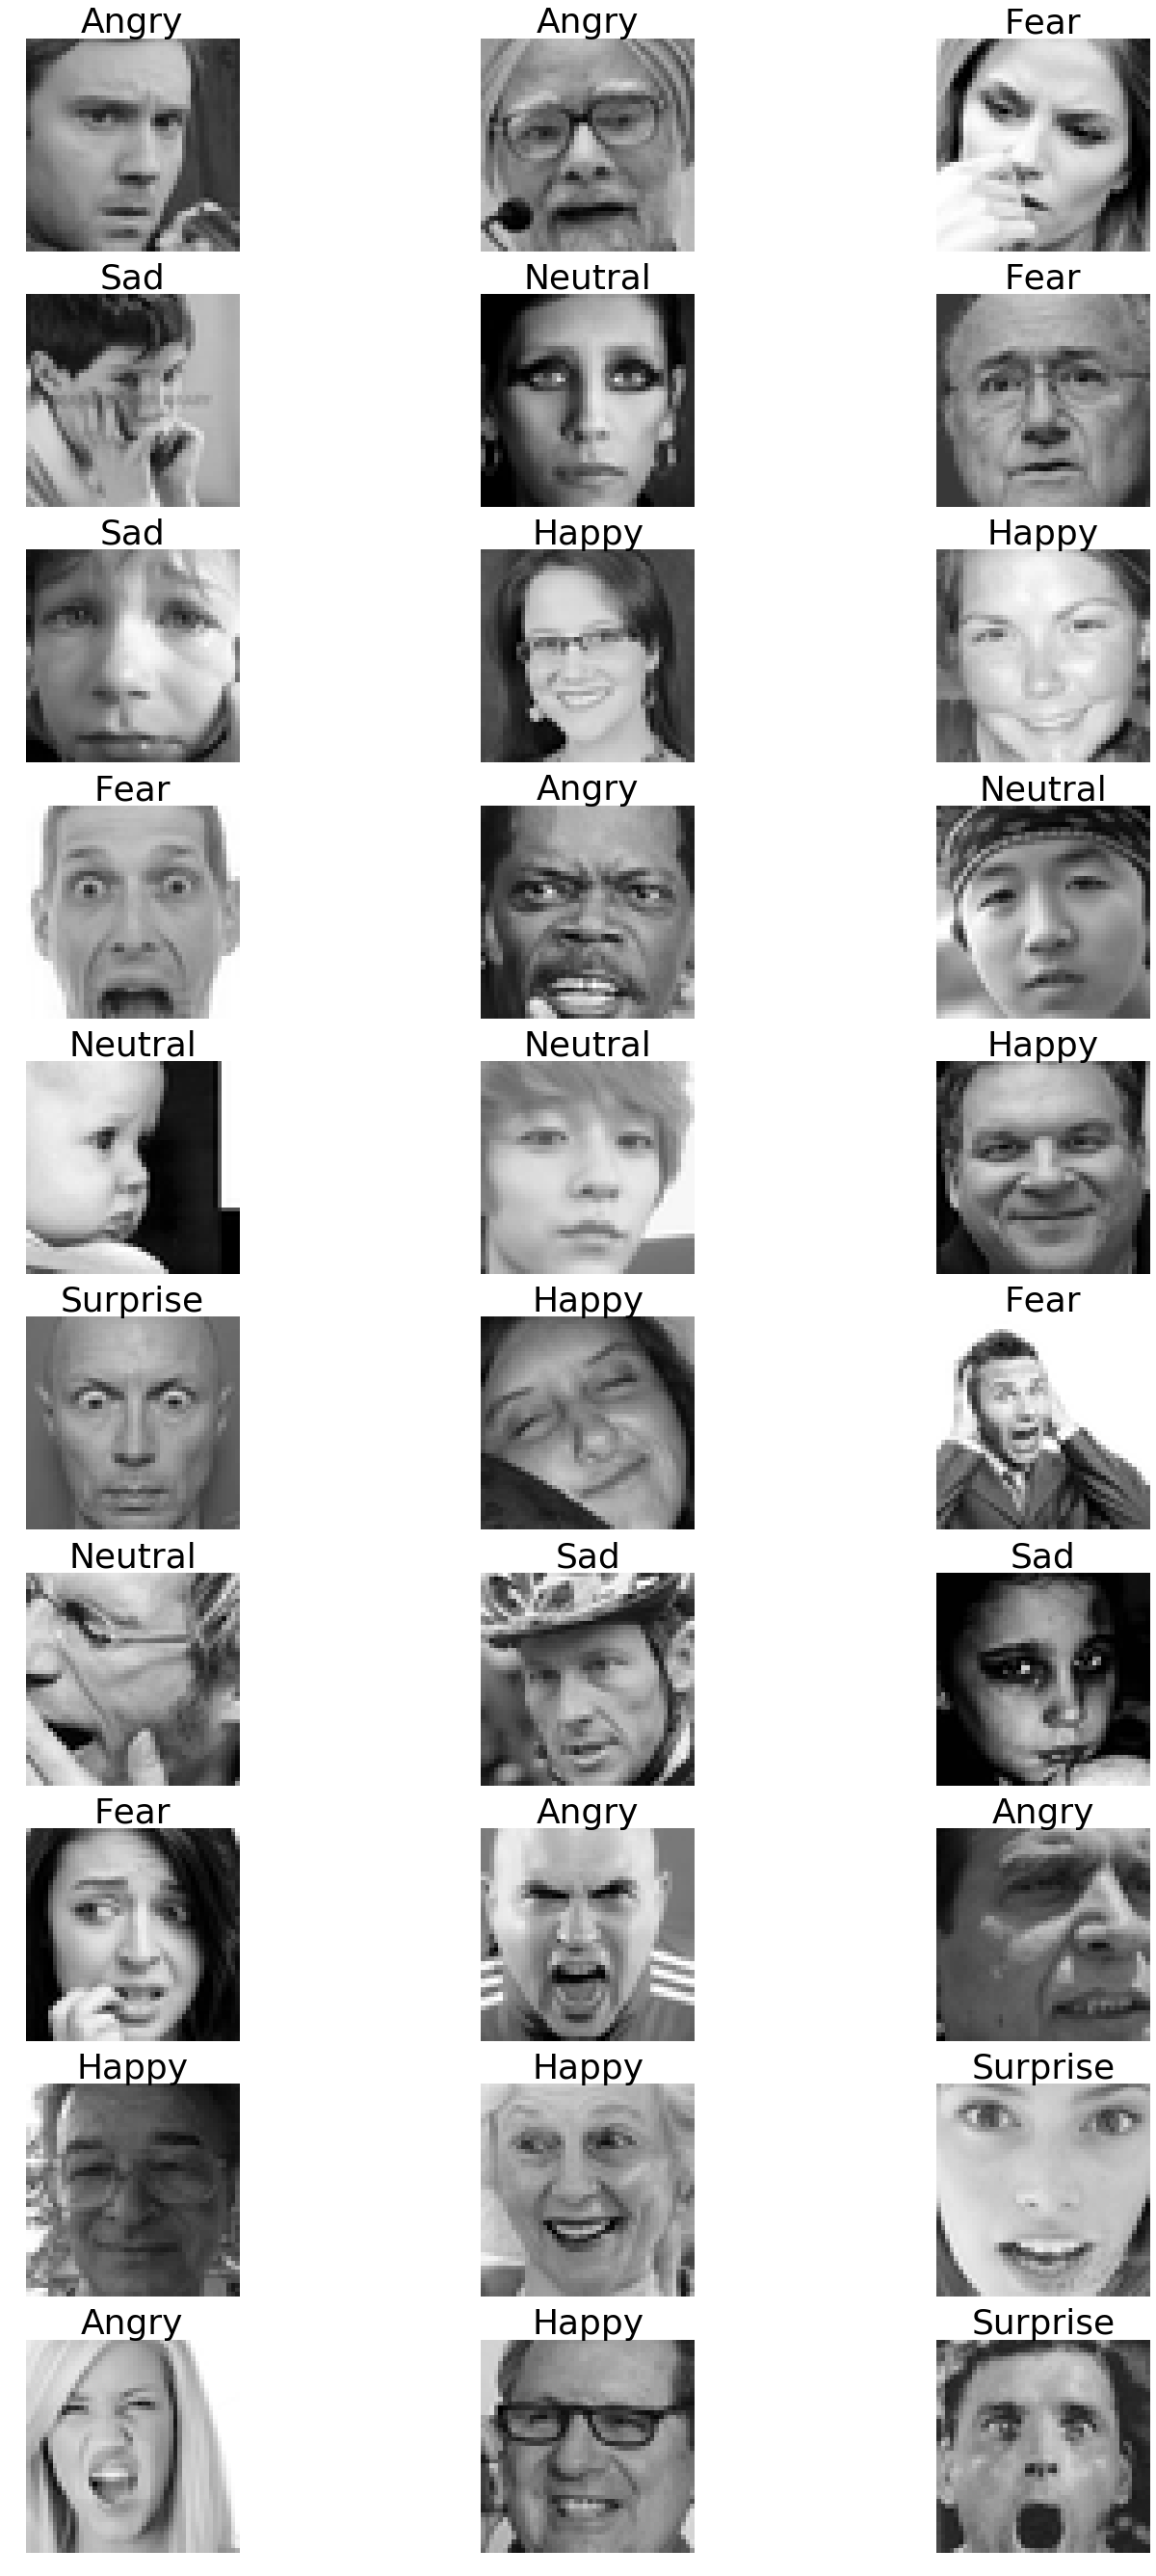

In [7]:
print('Training data shape {}'.format(images.shape))
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
f, axs = plt.subplots(int(n/ncol),ncol, figsize=(24,48))
for i in range(int(n/ncol)):
    for j in range(ncol):
        axs[i, j].imshow(images[ncol*i+j], cmap='gray', vmin=0, vmax=255)
        axs[i, j].set_title(label_dic[np.where(labels[ncol*i+j]==1)[0][0]], fontsize=36)
        axs[i, j].axis('off')


## Features
---

* Raw Images

* Facial Landmarks

* Histogram of Oriented Gradients


## Features - Facial Landmarks
---
Facial landmarks are the key-points on a hunman's face in an image, such as the position of (coordinates) of mouth, right eyebrow, left eyebrow, right eye, left eye, nose, and jaw.

There are many facial landmark detectors, with pre-trained models, available on internet to help detection landmark coordinates given an facial image. In this project, python package Dlib is chosen as the facial landmark detector. Dlib is trained on iBUG 300-W dataset, and can be used to estimate the location of 68 coordinates that map the facial points on a human's face.

<img src="./production/dlib-landmarks.png" stype="display:block; margin-left:auto; margin-right:auto" width="600" height="200"/>

## Feature - Facial Landmarks
---


In [13]:
print('training landmark shape {}'.format(landmarks.shape))
print('example first landmark coordinate {}'.format(landmarks[0,0,]))

training landmark shape (28709, 68, 2)
example first landmark coordinate [-2 15]


## Feature - Histogram of Oriented Gradients (HOG)
---

<div style="display:flex; flex-direction:row">
    <div style="width:75%">
    As a feature descriptor, HOG simplifies an image by extracting useful information and throwing away extraneous information. More specifically, in the HOG feature descriptor, the histograms of directions of gradients are used as features. Gradients ( in both x and y directions) of an images represent the edges and corners, which contains more information about objects than flat regions does. Typically, HOG converts an images of size $W (\text{width}) \times H (\text{height}) \times C (\text{color channels}) $ to a feature vector of length $n$. 
    </div >
   <div style="width:25%">
       <img src="./production/hog-example.png">
    </div>
</div>






## Feature - Histogram of Oriented Gradients (HOG)
---


In [15]:
print('training hog_features shape {}'.format(hog_features.shape))
print('example hog_features {}'.format(hog_features[0,]))

training hog_features shape (28709, 2592)
example hog_features [0.08888008 0.3537949  0.22782329 ... 0.2256986  0.02673978 0.04406654]


## Feature -  Overlay Features on Top of Images
---

In [19]:
idx = np.random.permutation(labels.shape[0])
n = 30
ncol = 3
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)

<Figure size 432x288 with 0 Axes>

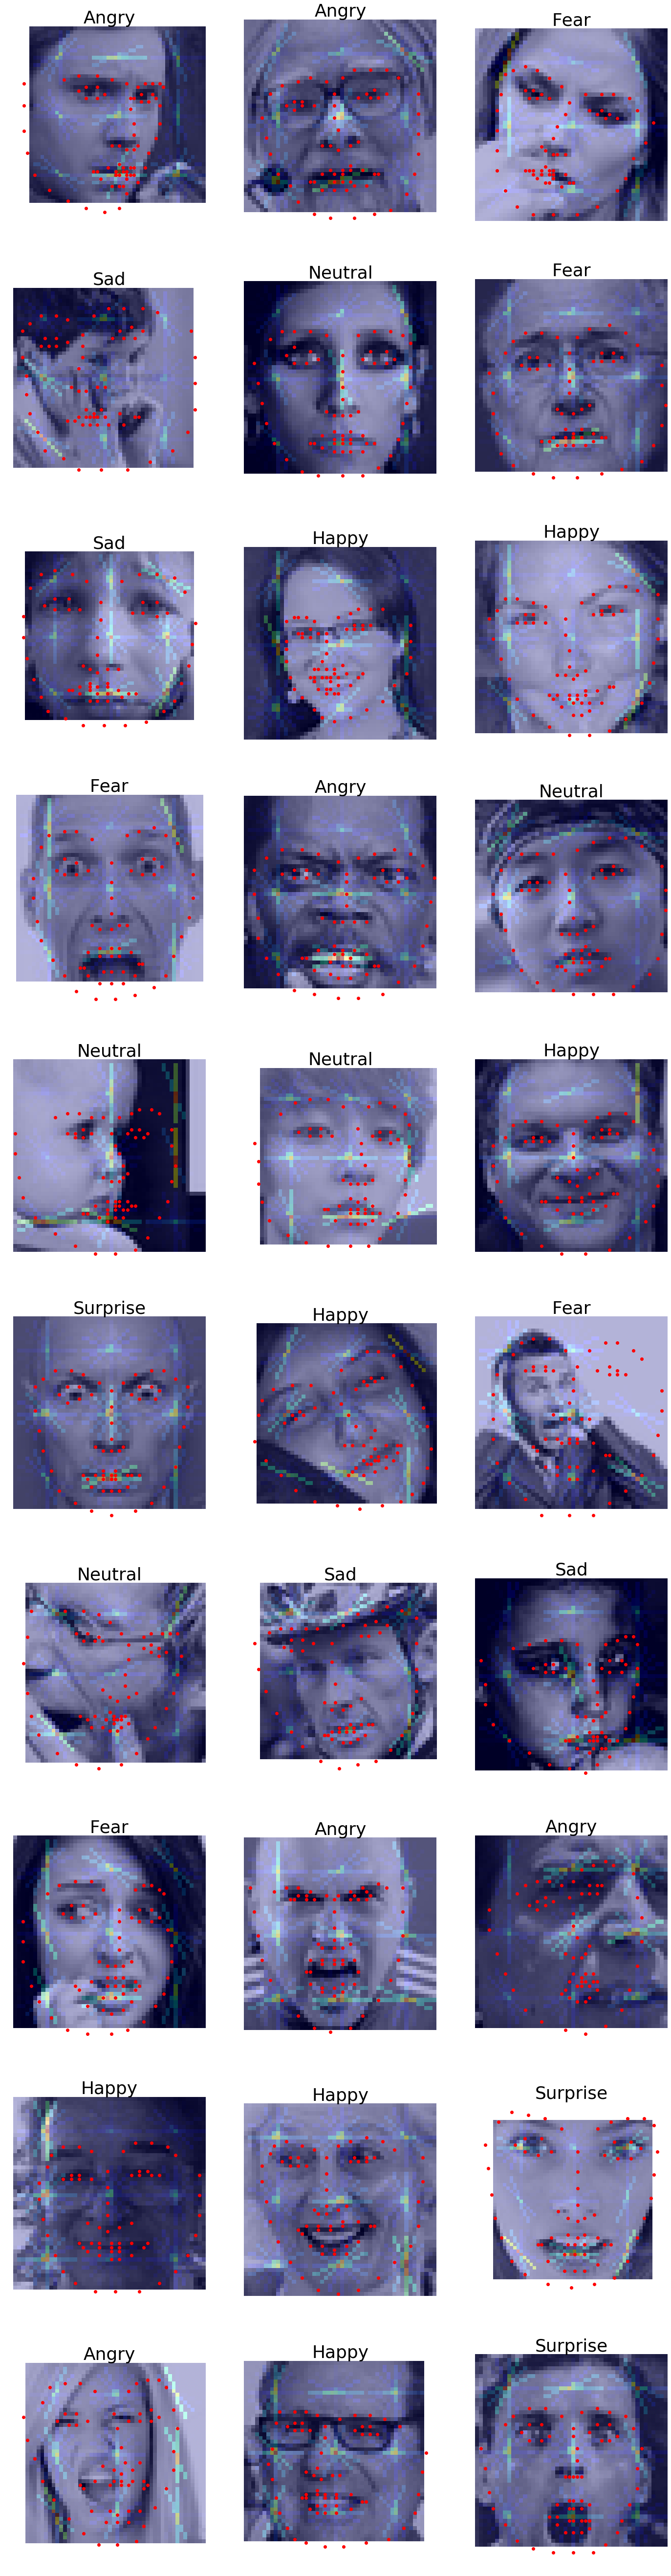

In [20]:
f, axs = plt.subplots(int(n/ncol),ncol, figsize=(24,96))
for i in range(int(n/ncol)):
    for j in range(ncol):
        axs[i, j].imshow(images[ncol*i+j], cmap='gray', vmin=0, vmax=255)
        axs[i, j].imshow(hog_images[ncol*i+j], cmap='jet', alpha=0.3)
        axs[i, j].set_title(label_dic[np.where(labels[ncol*i+j]==1)[0][0]], fontsize=36)
        axs[i, j].axis('off')
        landmark = landmarks[ncol*i+j]
        for k in landmark:
            axs[i, j].scatter(k[0], k[1], color="red")

## Feature - Dimension Reduction
---
Dimensions:
* Landmarks: $68\times2 = 136$
* HOG: $2592$
* Raw Images: $48\times48 = 2304$

In total, the dimension of training data is $N\times 5032$. Given the knowledge about dimension reduction we learned from class, it might be benefitial to reduce the dimension, and visualize the data in lower dimension. Hence the fllowing methods of dimension reduction has been tried:
* PCA
* LLE
* tSNE
* PCA + LLE
* PCA + tSNE

## Feature - PCA
---


In [52]:

# PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=40)
pca_result = pca.fit_transform(X_)

print('Total explained variation: {}'.format(sum(pca.explained_variance_ratio_)))
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Total explained variation: 0.8265500332160571
Explained variation per principal component: [0.28281787 0.10288654 0.09497237 0.05492177 0.03145482 0.02584479
 0.02167319 0.01963182 0.01798378 0.01497747 0.01135123 0.01111606
 0.01090837 0.01009256 0.00956942 0.00823284 0.00805734 0.00666031
 0.00569018 0.00542854 0.005351   0.00494941 0.00474015 0.0045355
 0.00432242 0.00412243 0.00410375 0.00390874 0.0036429  0.00345027
 0.00341681 0.00334817 0.00317053 0.00311948 0.00299838 0.00287294
 0.00274259 0.0025806  0.00249801 0.00240469]


In [53]:
import matplotlib
import matplotlib.pyplot as plt

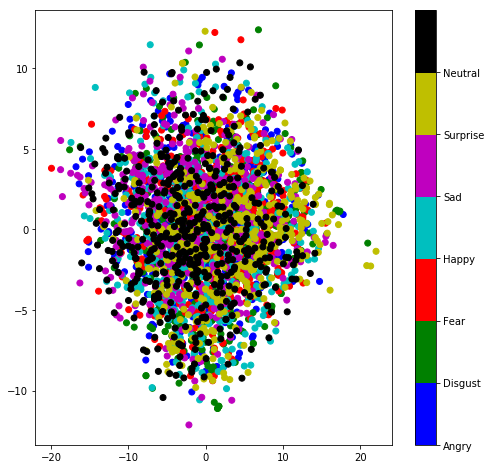

In [54]:
colors = ['b','g','r','c','m','y','k']

fig = plt.figure(figsize=(8,8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y_, cmap=matplotlib.colors.ListedColormap(colors))

cb = plt.colorbar()
loc = np.arange(0,max(y_),max(y_)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(
    ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
                 )

## Feature - LLE
---


In [55]:
# LLE
from sklearn.manifold import LocallyLinearEmbedding

embedding = LocallyLinearEmbedding(n_components=2)
embedding_result = embedding.fit_transform(X_)

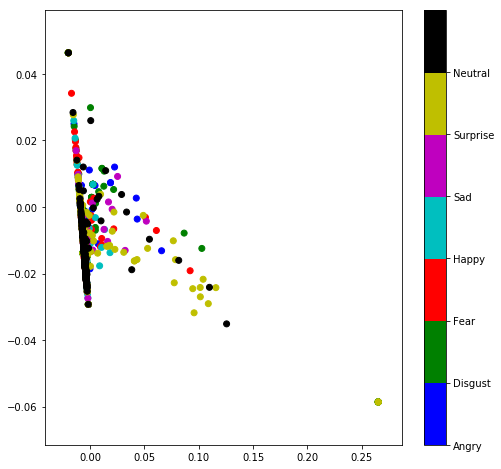

In [56]:
colors = ['b','g','r','c','m','y','k']

fig = plt.figure(figsize=(8,8))
plt.scatter(embedding_result[:, 0], embedding_result[:, 1], c=y_, cmap=matplotlib.colors.ListedColormap(colors))

cb = plt.colorbar()
loc = np.arange(0,max(y_),max(y_)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(
    ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
)

## Feature - tSNE
---

In [57]:
# tSNE
import time
from sklearn.manifold import TSNE



time_start = time.time()
tsne = TSNE(n_components=2, verbose=3, perplexity=40, n_iter=300)
tsne_result = tsne.fit_transform(X_)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3492 samples in 0.576s...
[t-SNE] Computed neighbors for 3492 samples in 100.320s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3492
[t-SNE] Computed conditional probabilities for sample 2000 / 3492
[t-SNE] Computed conditional probabilities for sample 3000 / 3492
[t-SNE] Computed conditional probabilities for sample 3492 / 3492
[t-SNE] Mean sigma: 2.967862
[t-SNE] Computed conditional probabilities in 0.159s
[t-SNE] Iteration 50: error = 81.5345688, gradient norm = 0.1594922 (50 iterations in 2.447s)
[t-SNE] Iteration 100: error = 81.4659195, gradient norm = 0.1126864 (50 iterations in 1.748s)
[t-SNE] Iteration 150: error = 81.5888062, gradient norm = 0.1163459 (50 iterations in 1.550s)
[t-SNE] Iteration 200: error = 81.3663483, gradient norm = 0.1153485 (50 iterations in 1.948s)
[t-SNE] Iteration 250: error = 82.1649017, gradient norm = 0.1215373 (50 iterations in 2.210s)
[t-SNE] KL divergence after 250 iter

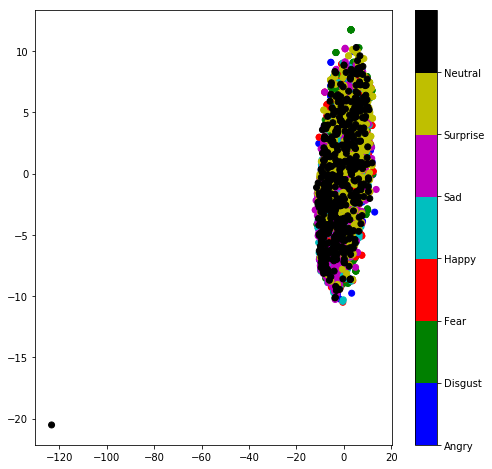

In [58]:
colors = ['b','g','r','c','m','y','k']

fig = plt.figure(figsize=(8,8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=y_, cmap=matplotlib.colors.ListedColormap(colors))

cb = plt.colorbar()
loc = np.arange(0,max(y_),max(y_)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(
    ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
                 )

## Feature - PCA + LLE
---

In [59]:
# PCA + LLE

from sklearn.manifold import LocallyLinearEmbedding

embedding = LocallyLinearEmbedding(n_components=2)
embedding_result = embedding.fit_transform(pca_result)

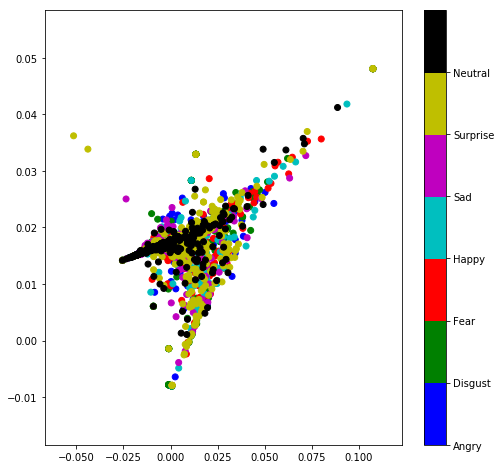

In [60]:
colors = ['b','g','r','c','m','y','k']

fig = plt.figure(figsize=(8,8))
plt.scatter(embedding_result[:, 0], embedding_result[:, 1], c=y_, cmap=matplotlib.colors.ListedColormap(colors))

cb = plt.colorbar()
loc = np.arange(0,max(y_),max(y_)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(
    ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
)

## Feature - PCA + tSNE
---


In [61]:
# PCA+tSNE

import time
from sklearn.manifold import TSNE



time_start = time.time()
tsne = TSNE(n_components=2, verbose=3, perplexity=40, n_iter=300)
tsne_result = tsne.fit_transform(pca_result)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3492 samples in 0.004s...
[t-SNE] Computed neighbors for 3492 samples in 0.674s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3492
[t-SNE] Computed conditional probabilities for sample 2000 / 3492
[t-SNE] Computed conditional probabilities for sample 3000 / 3492
[t-SNE] Computed conditional probabilities for sample 3492 / 3492
[t-SNE] Mean sigma: 2.871145
[t-SNE] Computed conditional probabilities in 0.142s
[t-SNE] Iteration 50: error = 79.2826309, gradient norm = 0.0507029 (50 iterations in 3.724s)
[t-SNE] Iteration 100: error = 77.2810516, gradient norm = 0.0273203 (50 iterations in 2.253s)
[t-SNE] Iteration 150: error = 77.3324966, gradient norm = 0.0493175 (50 iterations in 1.596s)
[t-SNE] Iteration 200: error = 77.4477310, gradient norm = 0.0409286 (50 iterations in 1.850s)
[t-SNE] Iteration 250: error = 77.0829391, gradient norm = 0.0436572 (50 iterations in 1.886s)
[t-SNE] KL divergence after 250 iterat

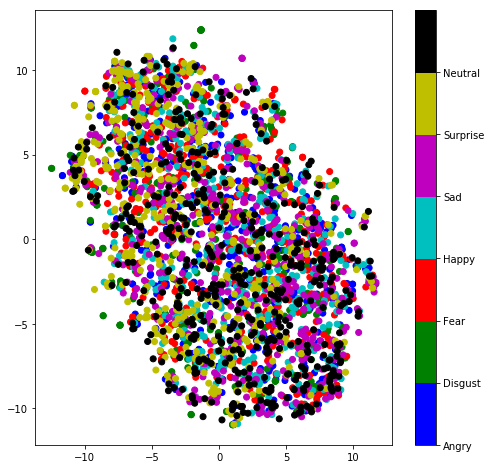

In [62]:
colors = ['b','g','r','c','m','y','k']

fig = plt.figure(figsize=(8,8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=y_, cmap=matplotlib.colors.ListedColormap(colors))

cb = plt.colorbar()
loc = np.arange(0,max(y_),max(y_)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(
    ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
                 )

## Methods
---
In the ICML 2013 Workshop contest, the organizer provided 4 baselines models: random choices, logistic regression, ZCA + 1-layer net, 2-layer MLP network, and 3-layer MLP network. There were 218 teams submitted 1963 entries, and 75 teams beat the best baseline (a 3-layer MLP) provided by the organizer.

<img src="./production/context_results.png" stype="display:block; margin-left:auto; margin-right:auto" width="600"/>

## Methods
---
1. **SVM**
    
    - as a baseline of this project
    - target to the logistic regression as benchmark


2. **CNN (with Neststerov Accleration)**
    
    - target at 3-layer network as benchmark

## Methods - SVM
---
Features: Raw Image + Facial Landmark + HOG

In [50]:
import numpy as np

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [4]:
import warnings
warnings.filterwarnings('ignore')
# load SVM model
import pickle
from sklearn.metrics import accuracy_score
svm_model = pickle.load(open('model.pkl', 'rb'))
y_pred= svm_model.predict(X_test)
accuracy = accuracy_score(y_test_int, y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_int, y_pred)

testing accuracy: 0.3499582056283087


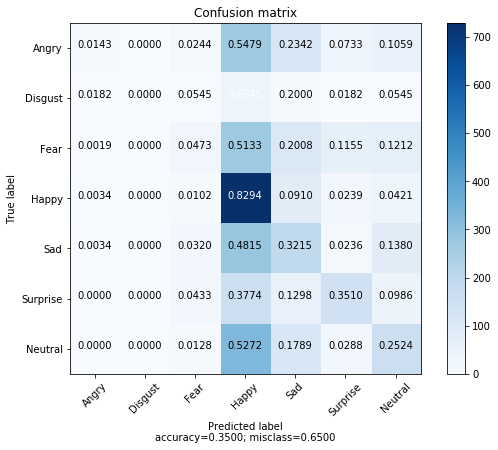

In [5]:
print(svm_model)
plot_confusion_matrix(cm, target_names=['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'])

## Methods - Simple CNN
---
Features: Image

In [1]:
from keras.models import load_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
simple_cnn = load_model('./saved_models/keras_fer2013_trained_model_ndam_2.h5')

Using TensorFlow backend.


```python
    model = Sequential()
    model.add(Conv2D(64, (9, 9), padding='same',
                     input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (5, 5), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
```

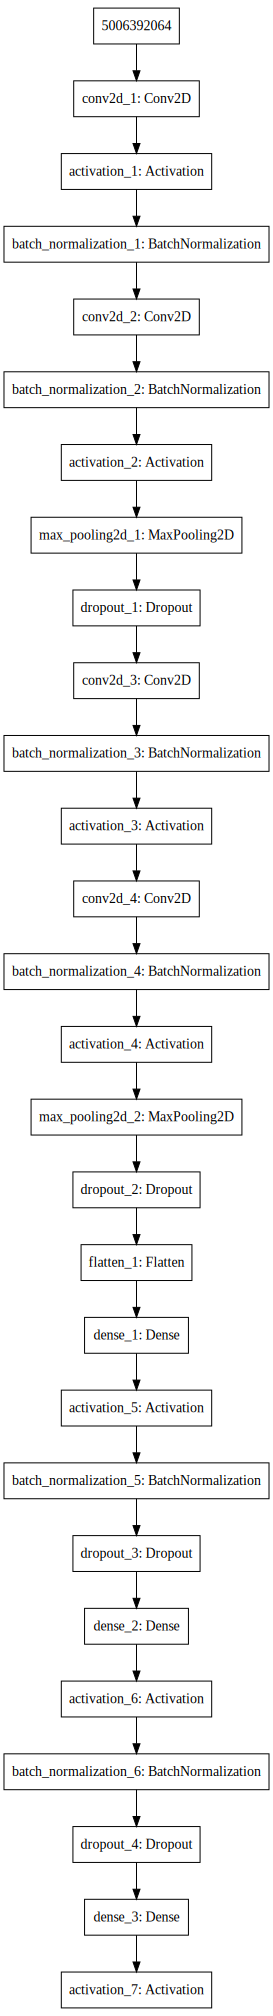

In [2]:
SVG(model_to_dot(simple_cnn).create(prog='dot', format='svg'))

In [16]:
x_test_simple = test_images.reshape((test_images.shape[0], test_images.shape[1], test_images.shape[2],1))
y_test_simple = test_labels
x_test_simple = x_test_simple.astype('float32')
x_test_simple /= 255

In [53]:
scores = simple_cnn.evaluate(x_test_simple, y_test_simple, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


3589/3589 [==============================] - 1s 305us/step
Test loss: 1.0305796676972145
Test accuracy: 0.7032599610251349


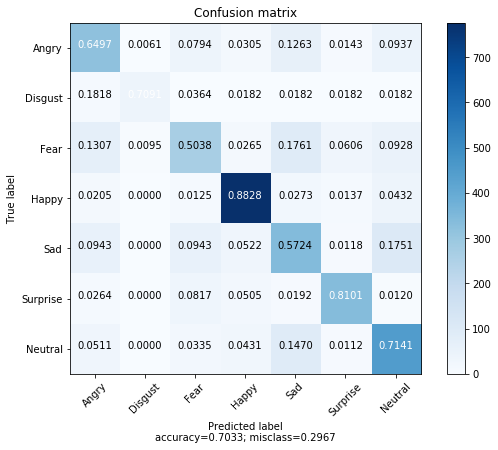

In [55]:
y_pred = [np.argmax(i) for i in simple_cnn.predict(x_test_simple)]
y_true = [np.where(i==1)[0][0] for i in y_test_simple]
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm, target_names=['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'])

In [57]:
def plot_conv_weights(model, layer):
    from math import sqrt, ceil
    W = model.get_layer(name=layer).get_weights()[0][:,:,0,:]
    print(W.shape)
    
    number_filters = W.shape[-1]
    n = ceil(sqrt(number_filters))
    fig, axs = plt.subplots(n,n, figsize=(10,10))
    fig.subplots_adjust(hspace = .5, wspace=.001)
    axs = axs.ravel()
    for i in range(n*n):
        if i<number_filters:
            axs[i].imshow(W[:,:,i])
            axs[i].set_title(str(i))
        axs[i].axis('off')

(9, 9, 64)


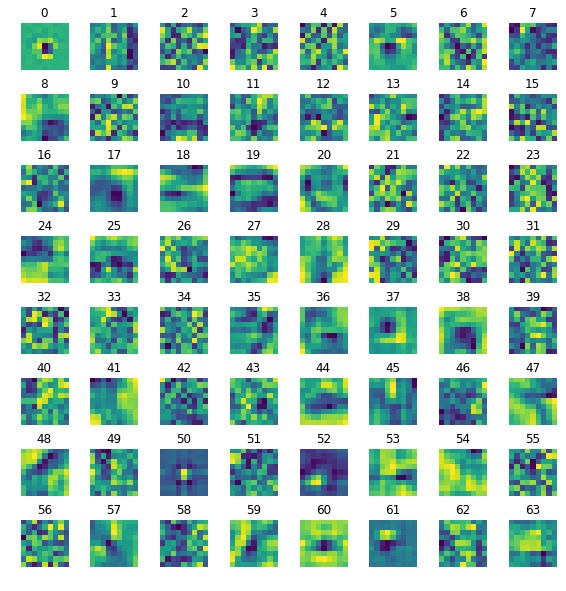

In [58]:
plot_conv_weights(simple_cnn, 'conv2d_1')

In [34]:
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1
    # fig.suptitle() 

In [34]:
from keras.models import Model
layer_outputs = [layer.output for layer in simple_cnn.layers]
activation_model = Model(inputs=simple_cnn.input, outputs=layer_outputs)
activations = activation_model.predict(np.array([x_test_simple[0]]))

true label: Angry
pred label: Angry


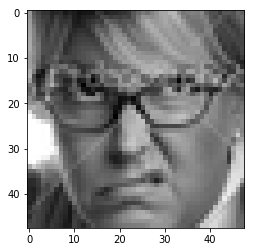

In [41]:
plt.imshow(x_test_simple[0][:,:,0], cmap='gray')
print('true label: {}'.format(label_dic[np.where(y_test_simple[0]==1)[0][0]]))
pred_ = np.argmax(simple_cnn.predict(np.array([x_test_simple[0]])))
print('pred label: {}'.format(label_dic[np.argmax(pred_)]))


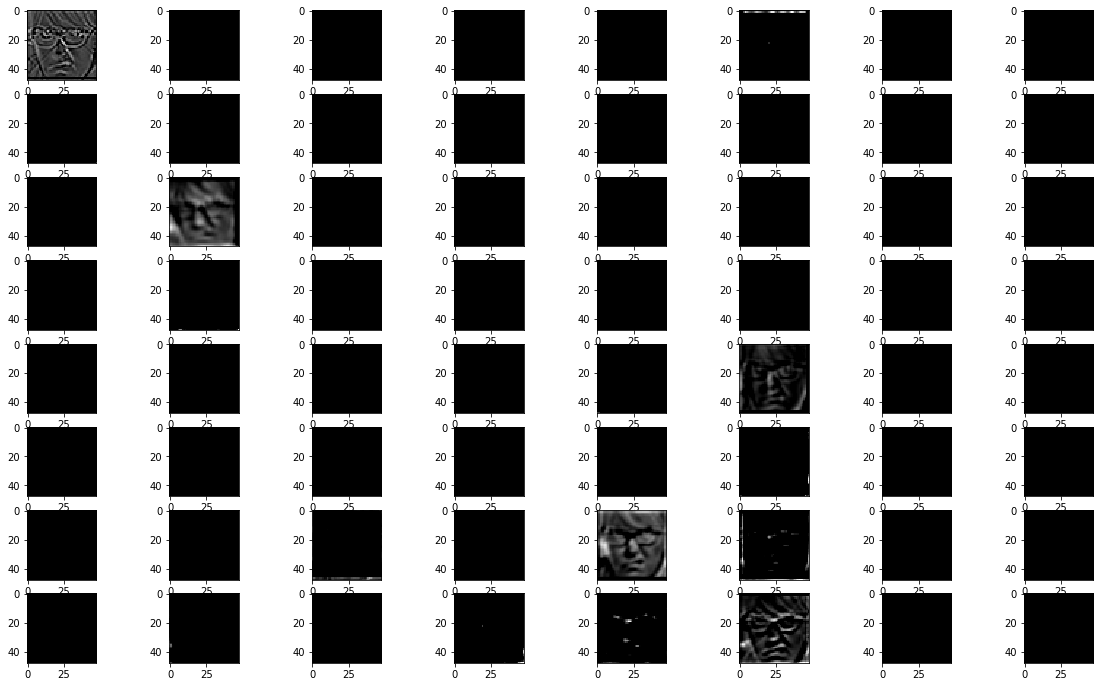

In [46]:
display_activation(activations, 8, 8, 1)

## Method - Transfer Learning (VGG19) + Features
---

<img src="./production/nnarch.png" stype="display:block; margin-left:auto; margin-right:auto" width="600" height="200"/>

## Method - Transfer Learning (VGG19) + Features
---

<img src="./production/vgg19.jpg" stype="display:block; margin-left:auto; margin-right:auto" width="600" height="200"/>

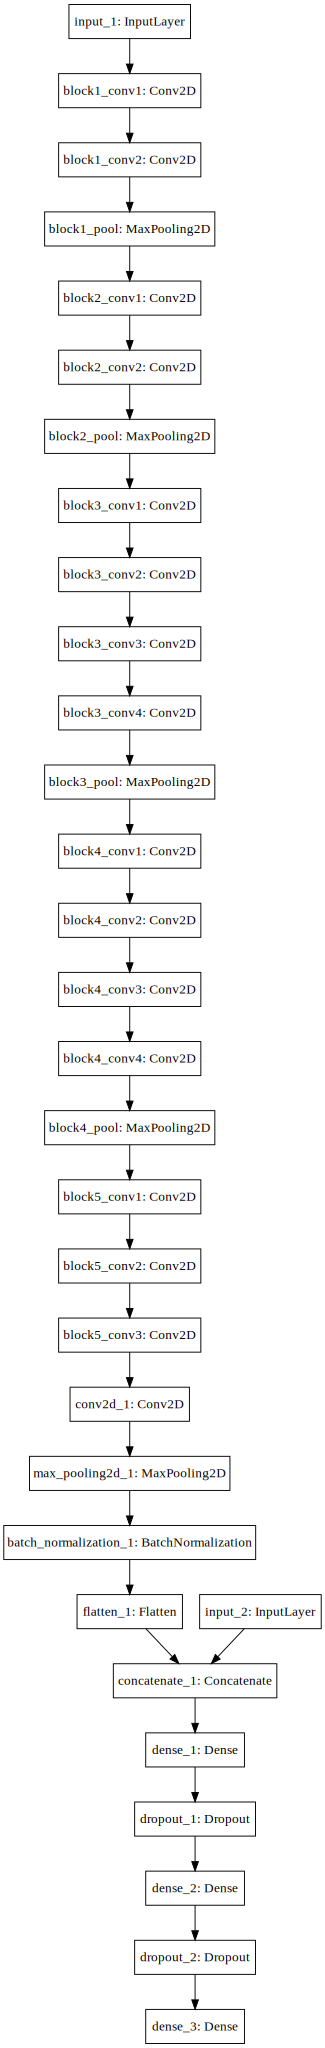

In [31]:
vgg19_trans_cnn = load_model('./saved_models/keras_fer2013_transfer_learning_cnn_VGG_19.h5')
SVG(model_to_dot(vgg19_trans_cnn).create(prog='dot', format='svg'))

In [69]:

x_test_features = np.concatenate((np.array([x.flatten() for x in test_landmarks]), test_hog_features), axis=1)
y_test = test_labels
x_test_features.astype('float32')
x_test_features /= 255

x_test_images = test_images
x_test_images = x_test_images.astype('float32')
x_test_images /= 255
x_test_images = np.repeat(x_test_images[:,:,:, np.newaxis], 3, axis=3)


In [73]:
scores = vgg19_trans_cnn.evaluate(x=[x_test_images, x_test_features], y=y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

3589/3589 [==============================] - 2s 676us/step
Test loss: 1.2161565935355967
Test accuracy: 0.5469490108748404


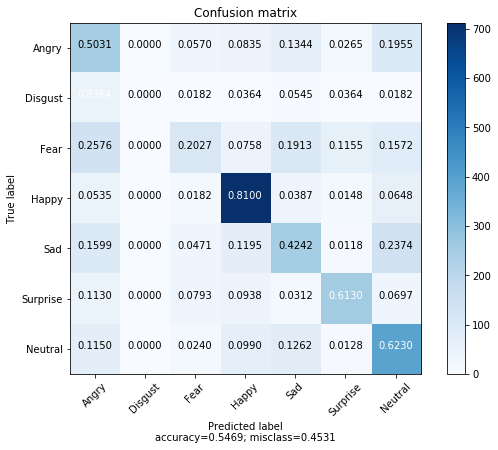

In [75]:
y_pred = [np.argmax(i) for i in vgg19_trans_cnn.predict([x_test_images, x_test_features])]
y_true = [np.where(i==1)[0][0] for i in y_test_simple]
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm, target_names=['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'])

## Q&A
---
Thank you!

In [27]:
from PIL import Image
from scipy import ndimage
import glob
import numpy as np
path = './testing/'
files = glob.glob(path+'*')
me_testing=[]
for file in files:
    orig_img = Image.open(file)
    orig_img = orig_img.convert('L')  # convert image to black and white
    orig_img = orig_img.resize((48, 48), Image.ANTIALIAS)
    I = np.asarray(orig_img, dtype=np.int32)
    me_testing.append(I)
me_testing = np.array(me_testing)
me_testing = np.expand_dims(me_testing, 3)
me_testing.shape

(14, 48, 48, 1)

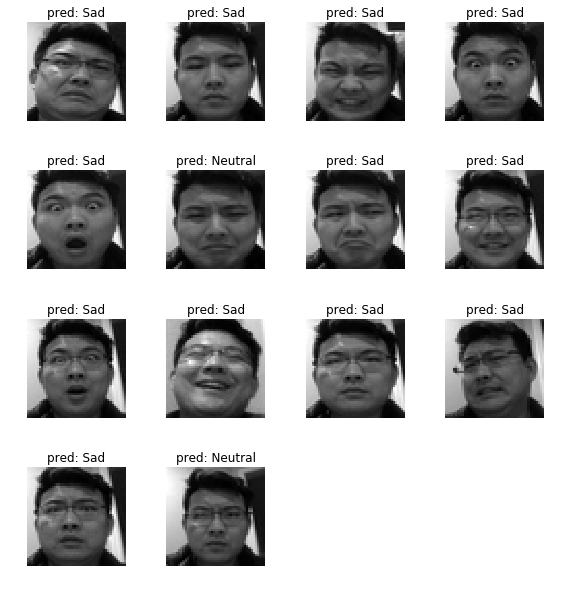

In [40]:
n=4
fig, axs = plt.subplots(n,n, figsize=(10,10))
fig.subplots_adjust(hspace = .5, wspace=.001)
y_pred_ = [np.argmax(i) for i in simple_cnn.predict(me_testing)]
label_pred_ = [label_dic[i] for i in y_pred_]
label_pred_
axs = axs.ravel()
for i in range(n*n):
    if i<14:
        axs[i].imshow(me_testing[i,:,:,0], cmap='gray')
        axs[i].set_title('pred: {}'.format(label_pred_[i]))
    axs[i].axis('off')

In [33]:
from keras.models import Model
layer_outputs = [layer.output for layer in simple_cnn.layers]
activation_model = Model(inputs=simple_cnn.input, outputs=layer_outputs)
activations = activation_model.predict(np.array([me_testing[0]]))

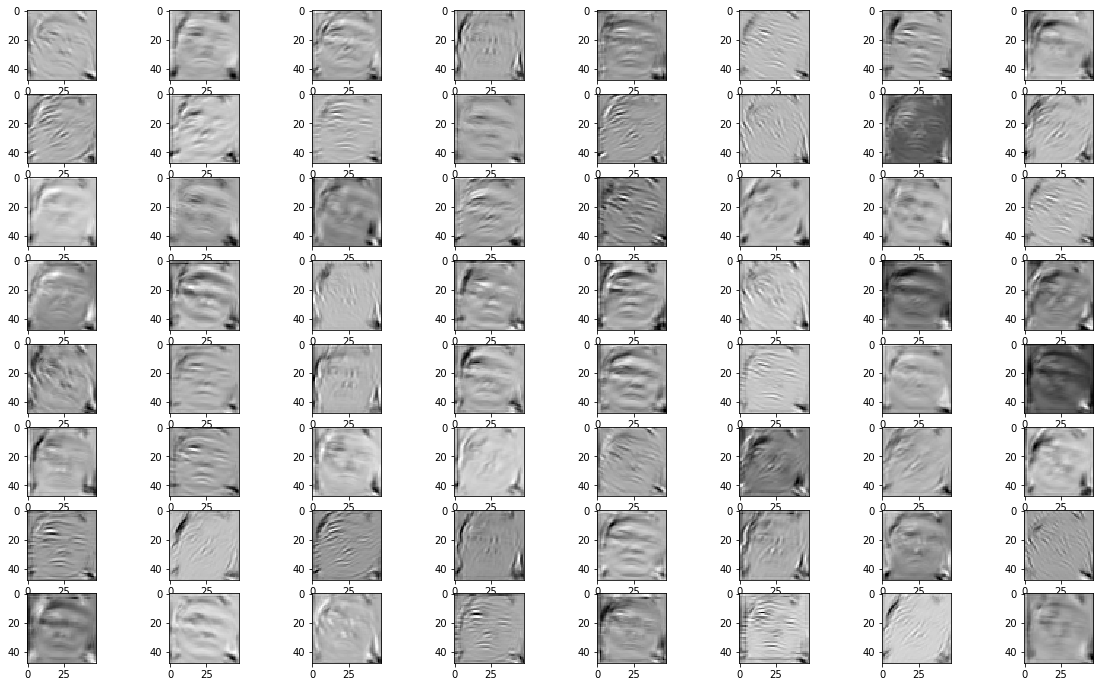

In [38]:
display_activation(activations, 8, 8, 4)